In [155]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from ani2x import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
df_gen

,Resolution,Release_Year,pK,Binding_Type,Binding_Symbol,Refined,R_factor,R_free,delta_R,ID,CASF_2016
PDB_ID,,,,,,,,,,,
3ZZF,2.20,2012,0.40,Ki,=,False,0.181,0.218,0.037,1,False
3GWW,2.46,2009,0.45,IC50,=,False,0.205,0.226,0.021,2,False
1W8L,1.80,2004,0.49,Ki,=,False,0.179,0.230,0.051,3,False
3FQA,2.35,2009,0.49,IC50,=,False,0.208,0.241,0.033,4,False
1ZSB,2.00,1996,0.60,Kd,=,False,0.164,-1.000,-1.000,5,False
...,...,...,...,...,...,...,...,...,...,...,...
7CPA,2.00,1994,13.96,Ki,=,False,0.189,-1.000,-1.000,19439,False
2XUF,2.55,2010,14.39,Kd,=,False,0.191,0.221,0.029,19440,False
1AVD,2.70,1994,15.00,Kd,=,False,0.174,-1.000,-1.000,19441,False


In [209]:
def get_list(name):
    with open(f'./losses/{name}.txt', 'r') as f:
        lines = f.readlines()
        lines = [float(line.rstrip('\n')) for line in lines]
    return lines

def get_losses_kind(name, kind, train_valid, n_models=8):
    losses = []
    for i in range(n_models):
        filepath = f'{train_valid}_losses{name}_{kind}_{i}'
        losses.append(get_list(filepath))
    return np.array(losses)
    


In [210]:
losses_pre_train = get_losses_kind('', 'pre', 'train')
losses_rand_train = get_losses_kind('', 'rand', 'train')
losses_pre_valid = get_losses_kind('', 'pre', 'valid')
losses_rand_valid = get_losses_kind('', 'rand', 'valid')

In [211]:
losses_pre_valid.min(), losses_rand_valid.min()

(1.5525991839041604, 1.8123932721250493)

In [212]:
losses_pre_valid.min(), losses_rand_valid.min()

(1.5525991839041604, 1.8123932721250493)

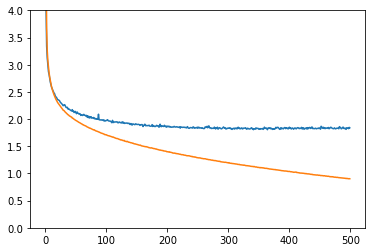

In [213]:
plt.plot(losses_pre_valid.mean(axis=0))
plt.plot(losses_pre_train.mean(axis=0));
plt.ylim(0, 4);

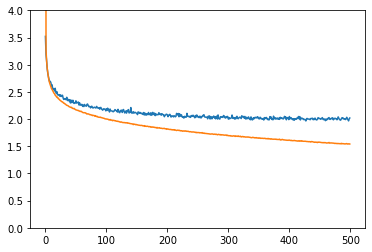

In [214]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_rand_train.mean(axis=0));
plt.ylim(0, 4);

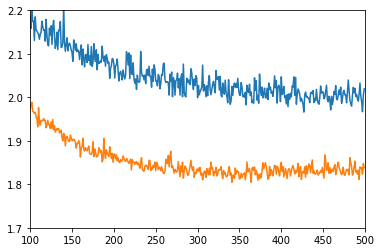

In [215]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.7, 2.2);
plt.xlim(100, 500);

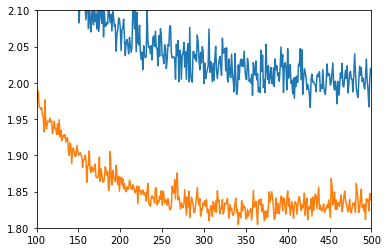

In [216]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.8, 2.1);
plt.xlim(100, 500);

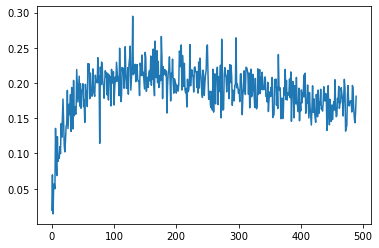

In [217]:
plt.plot(losses_rand_valid.mean(axis=0)[10:] - losses_pre_valid.mean(axis=0)[10:]);

In [218]:
losses_pre_valid.mean(axis=0)[:25].min() / losses_rand_valid.mean(axis=0)[:25].min()

0.9587369035225872

In [219]:
losses_rand_valid.mean(axis=0)[-20:].mean() - losses_rand_valid.mean(axis=0)[120:140].mean()

-0.13490975929735827

In [220]:
losses_pre_valid.mean(axis=0)[-20:].mean() - losses_pre_valid.mean(axis=0)[120:140].mean()

-0.09320694373833982

(120.0, 200.0)

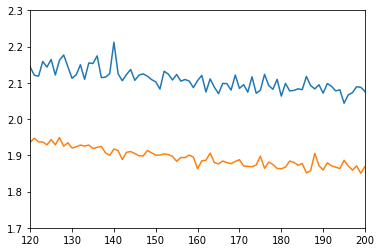

In [221]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(1.7, 2.3);
plt.xlim(120, 200)

In [222]:
# with open('./empty_pdb_ids.txt', 'w+') as f:
#     for line in list(empty_pdb_ids):
#         f.write(f"{line}\n")

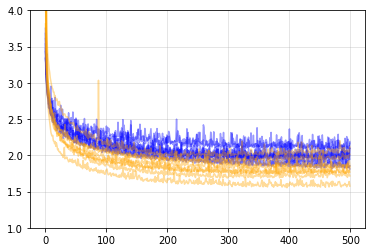

In [223]:
for loss in losses_rand_valid:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='orange', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 4);

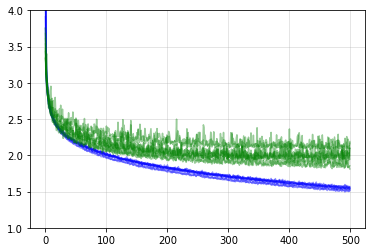

In [224]:
for loss in losses_rand_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_rand_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 4);

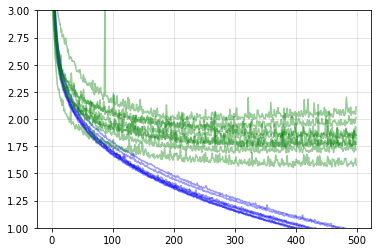

In [225]:
for loss in losses_pre_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(1, 3);

In [226]:
losses_pre_valid.min(axis=1).mean() / losses_rand_valid.min(axis=1).mean()

0.920113953062605

In [227]:
losses_pre_valid.min() / losses_rand_valid.min()

0.8566568899716352

In [228]:
np.mean([np.min(loss) for loss in losses_pre_valid]) / np.mean([np.min(loss) for loss in losses_rand_valid])

0.920113953062605

In [229]:
data_casf = load_pdb_bind_filtered(filter_out_casf=False)

In [230]:
model_pres = [load_best_model(id_=i, kind='pre') for i in range(N_MODELS)]
model_rands = [load_best_model(id_=i, kind='rand') for i in range(N_MODELS)]

In [231]:
consts_ani2x = get_consts_ani2x()
aev_computer_ani2x = get_aev_computer(consts_ani2x)

In [232]:
n_casf = len(data_casf)


In [233]:
testloader = get_data_loader(dataset=data_casf, batchsize=n_casf, shuffle=False)

In [177]:
output_pres = [get_model_output(model_pres[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]
output_rands = [get_model_output(model_rands[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]

In [198]:
output_pres = np.array(output_pres)
output_rands = np.array(output_rands)
output_pres_mean = output_pres.mean(axis=0)
output_rands_mean = output_rands.mean(axis=0)
labels = get_labels(testloader)

In [199]:
np.corrcoef(output_rands)

array([[1.        , 0.91695135, 0.96998933, 0.98432813, 0.97465238,
        0.96335948, 0.9638347 , 0.98774261],
       [0.91695135, 1.        , 0.88692346, 0.92813483, 0.88954603,
        0.91123436, 0.8651409 , 0.92262685],
       [0.96998933, 0.88692346, 1.        , 0.97138064, 0.97953364,
        0.94697205, 0.96977055, 0.96494345],
       [0.98432813, 0.92813483, 0.97138064, 1.        , 0.97111866,
        0.97316682, 0.95046476, 0.98617955],
       [0.97465238, 0.88954603, 0.97953364, 0.97111866, 1.        ,
        0.96226296, 0.98231758, 0.96321067],
       [0.96335948, 0.91123436, 0.94697205, 0.97316682, 0.96226296,
        1.        , 0.94568318, 0.96954945],
       [0.9638347 , 0.8651409 , 0.96977055, 0.95046476, 0.98231758,
        0.94568318, 1.        , 0.94626067],
       [0.98774261, 0.92262685, 0.96494345, 0.98617955, 0.96321067,
        0.96954945, 0.94626067, 1.        ]])

In [200]:
np.triu(np.corrcoef(output_pres, dtype='float16'))

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[   nan, 0.    ,    nan, 0.    ,    nan,    nan,    nan, 0.    ],
       [0.    , 0.9995, 0.    , 0.9575, 0.    ,    nan,    nan, 0.9595],
       [0.    , 0.    ,    nan,    nan,    nan,    nan,    nan,    nan],
       [0.    , 0.    , 0.    , 1.    , 0.    ,    nan,    nan, 0.9453],
       [0.    , 0.    , 0.    , 0.    ,    nan,    nan,    nan, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ,    nan,    nan,    nan],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,    nan,    nan],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    ]],
      dtype=float16)

In [201]:
np.triu(np.corrcoef(output_rands, dtype='float16'))

array([[0.9995, 0.9165, 0.9697, 0.9844, 0.975 , 0.963 , 0.964 , 0.988 ],
       [0.    , 1.    , 0.8867, 0.9287, 0.89  , 0.911 , 0.865 , 0.923 ],
       [0.    , 0.    , 1.    , 0.971 , 0.9805, 0.9463, 0.9697, 0.965 ],
       [0.    , 0.    , 0.    , 1.    , 0.9717, 0.973 , 0.9507, 0.9863],
       [0.    , 0.    , 0.    , 0.    , 1.    , 0.963 , 0.983 , 0.9634],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9453, 0.969 ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9463],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.9995]],
      dtype=float16)

In [202]:
get_corr(output_pres_mean, labels) - np.mean([get_corr(output_pres[i], labels) for i in range(N_MODELS)])

0.012835101596327059

In [203]:
get_corr(output_rands_mean, labels) - np.mean([get_corr(output_rands[i], labels) for i in range(N_MODELS)])

0.0035155206810787987

In [204]:
get_corr(output_rands_mean, labels)

0.07251313018294997

In [205]:
get_corr(output_pres_mean, labels)

0.5859387922223256

In [206]:
get_corr(output_pres_mean, labels) - get_corr(output_rands_mean, labels)

0.5134256620393756

In [187]:
data_casf[np.argmax(np.abs(output_rands_mean - labels) - np.abs(output_pres_mean - labels))]


{'species': tensor([3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0,
         2, 0, 0, 0, 1, 1, 3, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 3, 1, 1, 1, 1, 2, 0,
         2, 0, 1, 1, 3, 2, 0, 1, 1, 2, 0, 1, 1, 3, 1, 2, 0, 1, 1, 3, 1, 1, 3, 2,
         0, 0, 2, 0, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 2, 0, 1, 1, 3, 1, 2, 0, 1, 1,
         3, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 3, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2,
         0, 1, 1, 3, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 3, 1, 1, 3, 3, 2, 0, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'coordinates': tensor([[ 2.9328e+01, -9.2690e+00,  1.6547e+01],
         [ 3.6191e+01, -6.5450e+00,  1.1942e+01],
         [ 3.6819e+01, -2.0090e+00,  1.4800e+01],
         [ 3.5150e+01,  5.6420e+00,  1.9528e+01],
         [ 3.0390e+01,  2.1870e+00,  1.1875e+01],
         [ 3.1224e+01,  5.4920e+00,  1.2522e+01],
         [ 3.1052e+01, -9.1300e+00,  8.4770e+00],
         [ 3.4869e+01, -2.1350e+00,  1.0878e+01],
         [ 3.4300e+01, -3.0810e+00,  1.1728e+01

In [188]:
df_gen = load_df_gen()

In [189]:
df_gen[df_gen.ID == 13080]

,Resolution,Release_Year,pK,Binding_Type,Binding_Symbol,Refined,R_factor,R_free,delta_R,ID,CASF_2016
PDB_ID,,,,,,,,,,,
2VVN,1.85,2008,7.3,Kd,=,True,0.183,0.224,0.042,13080,True


In [190]:
labels

array([ 4.3 ,  3.28,  4.01,  9.89,  9.7 ,  7.96,  5.37,  6.48,  6.58,
        7.09, 11.15,  6.12,  5.  ,  8.25,  7.96,  7.4 ,  7.24,  6.8 ,
        4.89,  7.15,  4.76,  5.96,  9.04,  6.46,  5.15,  9.21,  5.44,
        2.27, 10.11,  6.17,  5.52,  9.72,  7.12,  8.4 ,  5.14,  4.86,
        7.6 ,  5.48,  8.02,  8.52,  6.06,  6.68,  6.42,  7.19, 10.3 ,
        9.  ,  9.54,  7.96,  6.11,  5.1 ,  3.66,  7.3 ,  8.52,  4.85,
        4.05,  4.45,  5.6 ,  7.05,  8.52,  6.32,  8.74,  6.12, 11.33,
        7.59,  8.43,  3.1 ,  7.2 ,  6.66,  6.83,  7.42,  5.79,  6.63,
        5.06,  9.46,  3.16,  6.32,  8.4 ,  4.76,  2.07,  7.15,  6.4 ,
        3.22,  5.64,  6.  ,  8.48,  5.16,  8.77,  8.4 ,  6.26,  5.36,
        6.02,  5.57,  3.76,  8.23,  8.  ,  8.85,  5.91,  4.19,  6.02,
        7.16,  7.7 ,  8.  ,  9.3 ,  8.11,  9.52,  2.36,  2.89,  6.9 ,
        7.26,  8.7 ,  2.52,  2.12,  5.1 ,  4.3 ,  5.72,  6.54,  6.89,
        6.3 ,  2.57,  8.1 ,  4.66, 10.7 ,  6.85,  3.7 ,  5.64, 11.82,
        7.26,  7.82,

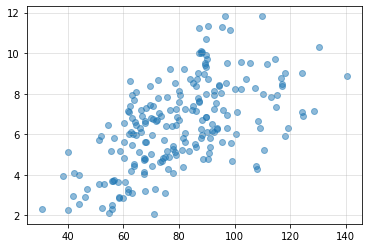

In [207]:
plt.scatter(output_pres_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);

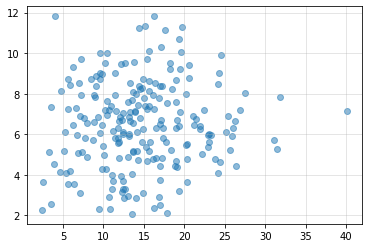

In [208]:
plt.scatter(output_rands_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);